# Project Goal : To help optimize marketing expenses of Yandex.Afisha

## Download the data and prepare it for analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import visit logs data, converting category type and datetime types
visit_logs = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'},parse_dates=['Start Ts','End Ts'])
print(visit_logs.info())
print(visit_logs.describe())
visit_logs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


Imported visit logs data, converting category type and datetime types looked general information about the dataset.

In [3]:
#Finding missing values 
visit_logs.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [4]:
#Finding Duplicates
visit_logs.duplicated().sum()

0

In [5]:
# Modify visit_logs column names
visit_logs = visit_logs.rename(columns={"Device": "device_type", "End Ts":"session_end", "Start Ts":"session_start", "Source Id":"source_id","Uid":"user_id"})
visit_logs

,device_type,session_end,source_id,session_start,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [6]:
# Import order logs data, converting datetime types
order_logs = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
print(order_logs.info())
print(order_logs.describe())
order_logs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Imported order logs data, converting datetime types looked general information about the dataset.

In [7]:
#Finding missing values 
order_logs.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [8]:
#Finding Duplicates
order_logs.duplicated().sum()

0

In [9]:
# Modify order_logs column names
order_logs = order_logs.rename(columns={"Buy Ts":"order_datetime", "Revenue":"revenue","Uid":"user_id"})
order_logs

,order_datetime,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [10]:
# Import costs data, converting datetime types
cost = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])
print(cost.info())
print(cost.describe())
cost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Imported cost data, converting datetime types looked general information about the dataset.

In [11]:
#Finding missing values 
cost.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [12]:
#Finding Duplicates
cost.duplicated().sum()

0

In [13]:
# Modify cost column names
cost = cost.rename(columns={"dt":"ad_datetime","costs":"ad_expenses"})
cost

,source_id,ad_datetime,ad_expenses
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


# Make reports and calculate metrics 

## Product 

###  How many people use it every day, week and month?

In [14]:
# How many people use it every day, week and month?

# Create product usage from visit logs table
product_usage = visit_logs.copy()

# Separate columsn for day, week, month values
product_usage['session_date'] = product_usage['session_start'].dt.date
product_usage['session_week'] = product_usage['session_start'].dt.week
product_usage['session_month'] = product_usage['session_start'].dt.month
product_usage['session_year'] = product_usage['session_start'].dt.year

# Calculate DAU: number of daily active unique users
dau_total = product_usage.groupby('session_date').agg({"user_id":"nunique"}).reset_index()
dau_total.columns = ['session_date', 'n_users']
dau_avg = dau_total['n_users'].mean()
print(round(dau_avg, 2))

# Calculate WAU: number of weekly active unique users
wau_total = product_usage.groupby('session_week').agg({"user_id":"nunique"}).reset_index()
wau_total.columns = ['session_week', 'n_users']
wau_avg = wau_total['n_users'].mean()
print(round(wau_avg, 2))

# Calculate DAU: number of monthly active unique users
mau_total = product_usage.groupby('session_month').agg({"user_id":"nunique"}).reset_index()
mau_total.columns = ['session_month', 'n_users']
mau_avg = mau_total['n_users'].mean()
print(round(mau_avg,2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


907.99
5825.29
23228.42


Daily Total Usage: 907.99 users
Weekly Total Usage: 5825.29 users
Monthly Total Usage: 23228.42 users

It's possible to explore user activity to find out how many unique visits this product gets to give insight as to what extend the service is interesting. The metrics to describe the numbe of active users can be expressed in terms of daily total usage (DAU), weekly total usage (WAU) and monthly total usage (MAU). These vanity metrics can be calculated by counting the average number of unique users for each day, week and months.

The number of daily active users of Yandex.Afisha is 908, the number of weekly active users is 5825 and the number of monthly active users is 23228.

In [15]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

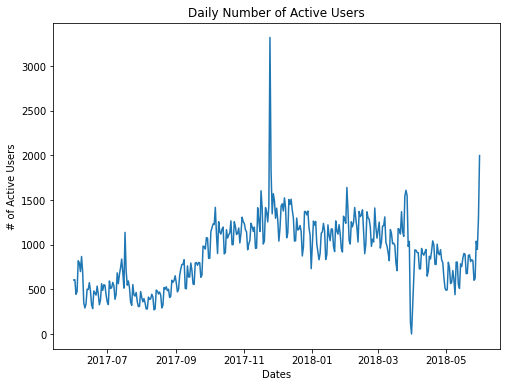

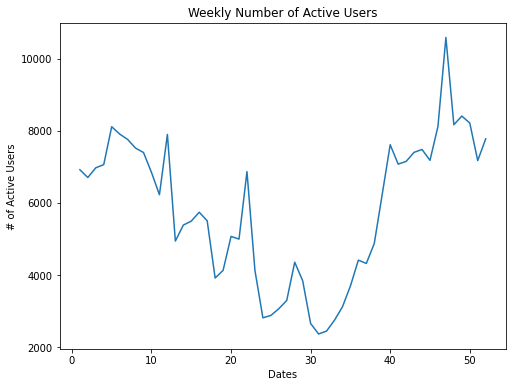

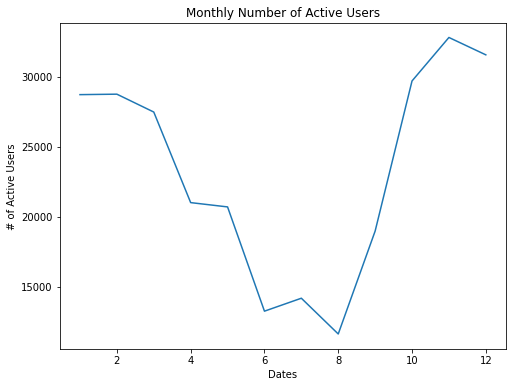

In [16]:
# plot daily active users
plt.figure(figsize=(8,6));
plt.plot(dau_total['session_date'],dau_total['n_users'])
plt.title('Daily Number of Active Users')
plt.xlabel('Dates')
plt.ylabel('# of Active Users')
plt.show()

# plot weekly active users
plt.figure(figsize=(8,6));
plt.plot(wau_total['session_week'],wau_total['n_users'])
plt.title('Weekly Number of Active Users')
plt.xlabel('Dates')
plt.ylabel('# of Active Users')
plt.show()

# plot monthly active users
plt.figure(figsize=(8,6));
plt.plot(mau_total['session_month'],mau_total['n_users'])
plt.title('Monthly Number of Active Users')
plt.xlabel('Dates')
plt.ylabel('# of Active Users')
plt.show()

###  How many sessions are there per day?

There are 987.36 sessions per day


,session_date,n_sessions,n_users
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820
...,...,...,...
359,2018-05-27,672,620
360,2018-05-28,1156,1039
361,2018-05-29,1035,948
362,2018-05-30,1410,1289


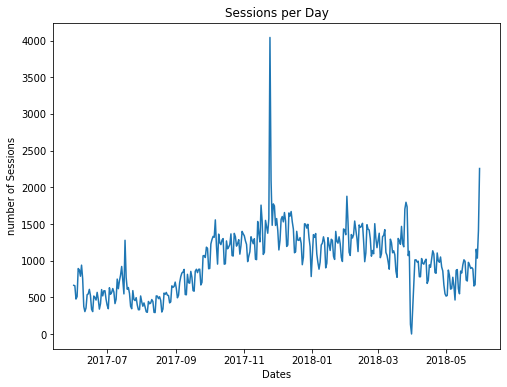

In [17]:
# How many sessions are there per day? (One user might have more than one session.)

# group the visit data by session date and then count the # of unqiue users and # of unique sessions
sessions_per_day = product_usage.groupby('session_date').agg({'user_id':['count','nunique']}).reset_index()
sessions_per_day.columns = ['session_date','n_sessions','n_users']
sessions_per_day_amount = sessions_per_day['n_sessions'].mean()
print('There are ' + str(round(sessions_per_day_amount, 2)) + " sessions per day")

#  Plot sessions per day
plt.figure(figsize=(8,6))
plt.plot(pd.to_datetime(sessions_per_day['session_date']),sessions_per_day['n_sessions'])
plt.title('Sessions per Day')
plt.xlabel('Dates')
plt.ylabel('number of Sessions')
sessions_per_day

There are 1.08 sessions per day


,session_date,n_sessions,n_users,n_user_session_per_day
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


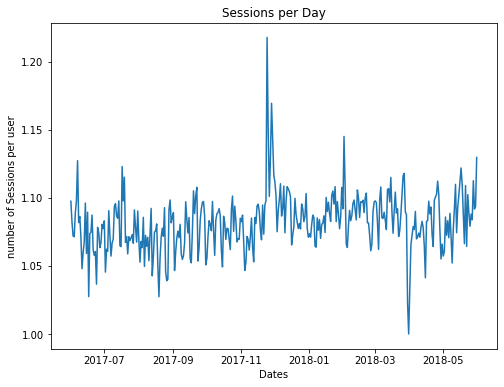

In [18]:
sessions_per_day['n_user_session_per_day']= sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day_user_amount = sessions_per_day['n_user_session_per_day'].mean()
print('There are ' + str(round(sessions_per_day_user_amount, 2)) + " sessions per day")
plt.figure(figsize=(8,6))
plt.plot(pd.to_datetime(sessions_per_day['session_date']),sessions_per_day['n_user_session_per_day'])
plt.title('Sessions per Day')
plt.xlabel('Dates')
plt.ylabel('number of Sessions per user')
sessions_per_day

To calculate the average number of unique sessions there on any given day, the visit data can be grouped by the date of the session and count the number of unique users and the number of unique sessions.
There is an average of 987.36 sessions per day for Yandex.Afisha.

###  What is the length of each session?

Average length per session: 300.0


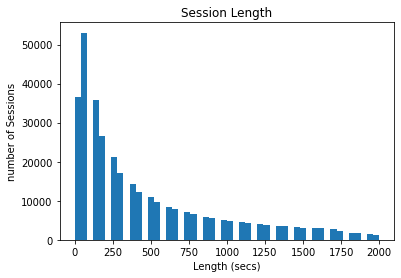

In [19]:
# What is the length of each session?

# calculate the duration of a session(session_end - session_start)
product_usage['session_duration_sec'] = (product_usage['session_end'] - product_usage['session_start']).dt.seconds

# calculate the average duration
average_length_per_session = product_usage['session_duration_sec'].median()
print('Average length per session:', round(average_length_per_session, 2))

plt.hist(product_usage['session_duration_sec'],range=[0,2000],bins=50)
plt.title('Session Length')
plt.xlabel('Length (secs)')
plt.ylabel('number of Sessions')
plt.show()

To calculate the average length of each session, we can examine every row in the visit dataframe and find the difference between the datetime of the end of a session and the datetime of the start of a session.
The average length of each session is 300 seconds (5 mins).

###  How often do users come back?

15.59% of users on average come back weekly
3.91% of users on average come back monthly


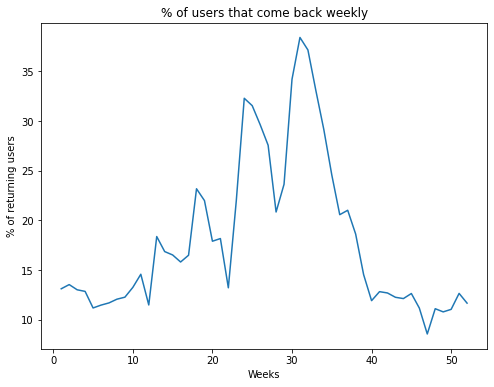

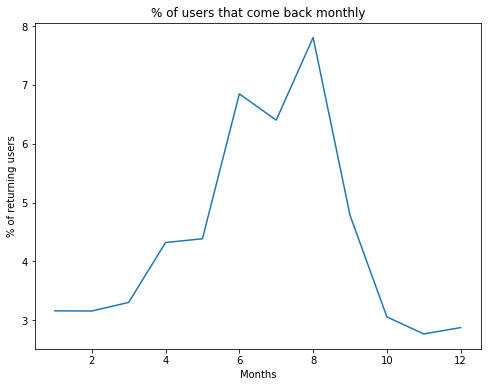

In [20]:
# How often do users come back?

# calculate sticky factor metrics
sticky_weekly_avg = (dau_avg / wau_avg) * 100
print(str(round(sticky_weekly_avg, 2)) + "% of users on average come back weekly")

sticky_monthly_avg = (dau_avg / mau_avg) * 100
print(str(round(sticky_monthly_avg, 2)) + "% of users on average come back monthly")

# graph sticky factor metrics 
wau_total['sticky_weekly'] = (dau_avg / wau_total['n_users']) * 100
plt.figure(figsize=(8,6))
plt.plot(wau_total['session_week'],wau_total['sticky_weekly'])
plt.title('% of users that come back weekly')
plt.xlabel('Weeks')
plt.ylabel('% of returning users')
plt.show()

mau_total['sticky_monthly'] = (dau_avg / mau_total['n_users']) * 100
plt.figure(figsize=(8,6))
plt.plot(mau_total['session_month'],mau_total['sticky_monthly'])
plt.title('% of users that come back monthly')
plt.xlabel('Months')
plt.ylabel('% of returning users')
plt.show()

  device_type         session_end  source_id       session_start  \
0       touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1     desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2       touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3     desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4     desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id session_date  session_week  session_month  \
0  16879256277535980062   2017-12-20            51             12   
1    104060357244891740   2018-02-19             8              2   
2   7459035603376831527   2017-07-01            26              7   
3  16174680259334210214   2018-05-20            20              5   
4   9969694820036681168   2017-12-27            52             12   

   session_year  session_duration_sec first_activity_date  
0          2017                  1080 2017-12-20 17:20:00  
1          2018                  1680 2018-02-19 16:53:0

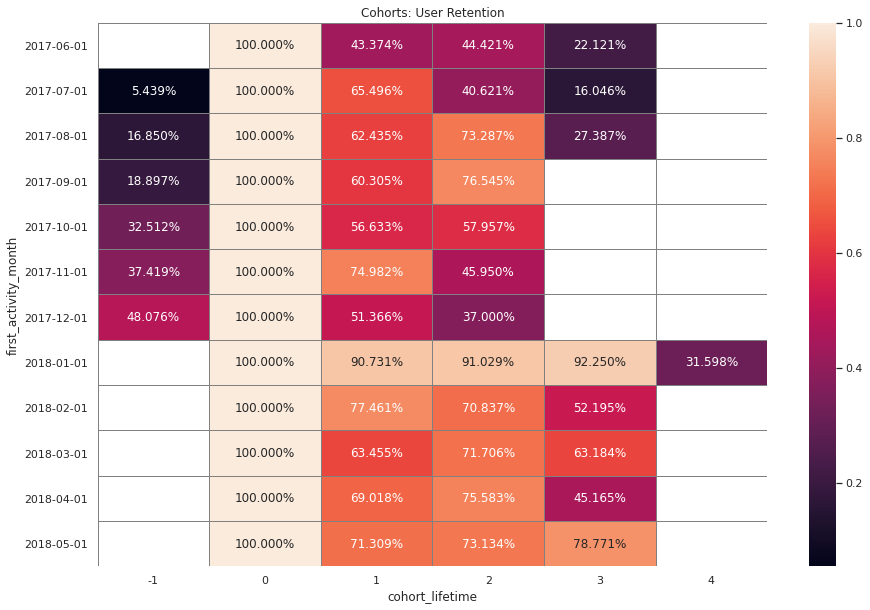

In [21]:
product_usage['session_start'] = pd.to_datetime(product_usage['session_start'])
first_activity_date = product_usage.groupby(['user_id'])['session_start'].min()
first_activity_date.name = 'first_activity_date'
user_activity = product_usage.join(first_activity_date,on='user_id')
print(user_activity.head())

user_activity['first_activity_month'] = user_activity['session_start'].astype('datetime64[M]').dt.date
user_activity['activity_month'] = (pd.to_datetime(user_activity['session_start'],
                                                unit='d')
                                  - pd.to_timedelta(user_activity['session_start'].dt.month,
                                                    unit='d')).dt.date

user_activity['cohort_lifetime'] = user_activity['activity_month'] - user_activity['first_activity_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'W')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)
cohorts = user_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'user_id']
]
#print(initial_users_count) 

initial_users_count = initial_users_count.rename(
    columns={'user_id': 'cohort_users'}
) 
cohorts = cohorts.merge(initial_users_count, on='first_activity_month') 
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] 

print(cohorts['retention'].mean())

retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

#retention_5 = retention_pivot[[0,1,2,3,4,5]]

import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.3%', linewidths=1, linecolor='gray'
)
plt.show()

To calculate how often users come back, we can calculate the stick factor metrics in terms of weeks and months. This is found by dividing the number of daily active users by the number of weekly active users (to find the number of times users come back weekly) and dividing the number of daily active users by the number of monthly active users (to find the number of times users come back monehtly).

Almost 16% of users come back weekly and 4% of users come back monthly.

##  Sales 

###  When do people start buying?

In [22]:
# When do people start buying?

# for each user, find date of first order
first_order_dates = order_logs.groupby('user_id').agg({'order_datetime':'min'}).reset_index()
first_order_dates.columns= ['user_id','first_order_date']
first_order_dates['first_order_month'] = first_order_dates['first_order_date'].dt.month

# for each user, find date of first session
first_session_dates = visit_logs.groupby('user_id').agg({'session_start':'min'}).reset_index()
first_session_dates.columns= ['user_id','first_session_date']
first_session_dates['first_session_month'] = first_session_dates['first_session_date'].dt.month

# merge tables on user_id
turnover = pd.merge(first_session_dates, first_order_dates, on='user_id')

# calculate time between first session and first order
turnover['turnover_time_days'] = (turnover['first_order_date'] - turnover['first_session_date']).dt.days
print(turnover)

avg_turnover_time = turnover['turnover_time_days'].mean()
print('People start buying ' + str(round(avg_turnover_time,2)) +" days after first registering")

                    user_id  first_session_date  first_session_month  \
0           313578113262317 2017-09-18 22:49:00                    9   
1          1575281904278712 2017-06-03 10:13:00                    6   
2          2429014661409475 2017-10-11 17:14:00                   10   
3          2464366381792757 2018-01-27 20:10:00                    1   
4          2551852515556206 2017-11-24 10:14:00                   11   
...                     ...                 ...                  ...   
36518  18445147675727495770 2017-08-20 13:30:00                    8   
36519  18445407535914413204 2017-09-22 23:48:00                    9   
36520  18445601152732270159 2017-08-07 11:51:00                    8   
36521  18446156210226471712 2017-11-07 10:01:00                   11   
36522  18446167067214817906 2017-10-17 10:05:00                   10   

         first_order_date  first_order_month  turnover_time_days  
0     2018-01-03 21:51:00                  1                 106  
1

In [23]:
bins = [0, 5, 10, 20, 30, 90, 180, 400]
labels = ['0-5d','5-10d','10-20d','20-30d','30-90d','90-180d','>180d']
turnover['turnover_cohort'] = pd.cut(x=turnover['turnover_time_days'], bins=bins, labels=labels)

To discover when people start buying, we can find the date of the first visit/session and first order for each user. By subtracting the date of the first visit from the date of the first order, we can find how long after the first visit the user made an order and purchased the product. We can find the average turnover time with the mean.

The average turnover time for users from the first visit to the first order for Yandex.Afisha is about 16 days.

###  how many users in each cohort?

In [24]:
# how many users in each cohort
users_per_cohort = turnover.groupby('turnover_cohort')['user_id'].nunique().reset_index()
users_per_cohort.columns = ['turnover_cohort','n_users']

# calculate % of users in each cohort
total_users = users_per_cohort['n_users'].sum()
users_per_cohort['users %'] = (users_per_cohort['n_users'] / total_users) * 100

display(users_per_cohort)

,turnover_cohort,n_users,users %
0,0-5d,2602,25.610236
1,5-10d,947,9.320866
2,10-20d,1039,10.226378
3,20-30d,670,6.594488
4,30-90d,2274,22.381890
5,90-180d,1748,17.204724
6,>180d,880,8.661417


Most users start buying between 0 to 5 days after the first session at almost 80% of users but thereafter, the largest turnover cohort falls in the 3-6 month window at 6% of users.

###  How many orders do they make during a given period of time?

In [25]:
# How many orders do they make during a given period of time? 

# extract order month for each order
order_logs['order_month'] = order_logs['order_datetime'].astype('datetime64[M]').dt.month

# group by order month and find # of unique users placing orders each month and find # of orders made each month
unique_orders = order_logs.groupby('order_month').agg({'user_id':'nunique','order_datetime':'count'}).reset_index()
unique_orders.columns = ['order_month','n_unique_users','n_orders']

# create col with average monthly orders per month
unique_orders['average_monthly_orders'] = unique_orders['n_orders'] / unique_orders['n_unique_users']

# calculate average monthly purchases
avg_monthly_purchases = round(unique_orders['average_monthly_orders'].mean(), 2)

print('The average number of orders made in any given month is ' + str(avg_monthly_purchases))

The average number of orders made in any given month is 1.22


To find how many orders do users make during a period of time, we can start by defining a period of time as a single month. Now the question becomes how many orders do users make during a months time? We can extract the month of each order from the datetime of the order, group the orders by the months, count the # of unique users ordering for each month, count the number of orders made each month and then find the average number of monthly orders by diving the number of orders with the number of unique users.

The average number of orders made during a month for Yandex.Afisha is 1.22 orders.

###  What is the average purchase size?

In [26]:
# What is the average purchase size?

avg_purchase_size = round(order_logs['revenue'].mean(), 2)
print("The average purchase size is " + str(avg_purchase_size) + " dollars per purchase")



The average purchase size is 5.0 dollars per purchase


To find the average purchase size for each order, we can calculate the average of the revenue made from each order.

The average purchase size for Yandex.Afisha is about $5 per purchase.

### LTV 

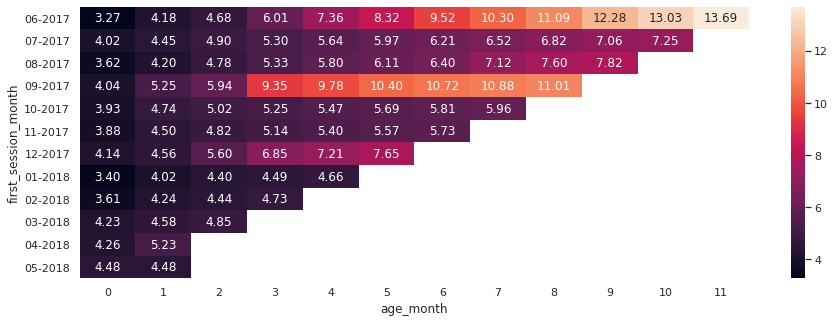

In [27]:
# How much money do they bring? (LTV)
# LTV (lifetime value) is the total amount of money a customer brings to the company on average by making purchases

# # copy dataframes
orders = order_logs.copy()
visit = visit_logs.copy()
visit = visit[['session_start','user_id']]

# extract month and date for each datetime row 
orders['order_month'] = orders['order_datetime'].astype('datetime64[M]')
orders['order_date'] = orders['order_datetime'].dt.date

# Calculate when first order for each customer have happened

visits_and_orders = orders.join(visit
                      .sort_values(by='session_start')
                      .groupby(['user_id'])
                      .agg({'session_start': 'min'}),
                      on='user_id', how='inner')

visits_and_orders['first_session_month'] = visits_and_orders['session_start'].astype('datetime64[M]')

# Create cohorts based on first purchase date and revenue

cohort_sizes = visits_and_orders.groupby('first_session_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'user_id': 'n_buyers'}, inplace=True)
cohorts = visits_and_orders.groupby(['first_session_month', 'order_month']).agg({'revenue': ['sum', 'count']}).reset_index()

# Calculate cohort age

cohorts['age_month'] = (cohorts['order_month'] - cohorts['first_session_month']) / np.timedelta64(1, 'M')
cohorts['age_month'] = cohorts['age_month'].round().astype('int')
cohorts.columns = ['first_session_month', 'order_month', 'revenue', 'n_orders', 'age_month']

# Merge our cohort tables to the final cohort report
report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
report['ltv'] = report['revenue'] / report['n_buyers']

# Create LTV table
ltv_cohort = report.pivot_table(
    index = 'first_session_month',
    columns = 'age_month',
    values = 'ltv',
    aggfunc = 'sum').cumsum(axis=1)

plt.figure(figsize=(15, 5))
ax = sns.heatmap(ltv_cohort, annot=True, fmt='.2f')
ax.set_yticklabels(ltv_cohort.index.strftime('%m-%Y'))
plt.show()

LTV (lifetime value) is the total amount of money a customer brings to the company on average by making purchases. To calcuate this metric, I extracted the first order month and all months afterwards and grouped this data per user while adding up the revenue. I found the gross profit for each cohort and then calculated LTV from that. The heatmap indicates that the most revenue is always from the first order month and afterwards, the trend tends to decrease so the customer does not bring the company much money after it's initial purchase.

For the most part, the lifetime value per customer increases over time.

## Marketing 

###  How much money was spent? 

In [28]:
# How much money was spent? 

# Overall
cost_overall = cost['ad_expenses'].sum()
print('The overall amount spent on marketing was $' + str(cost_overall))

The overall amount spent on marketing was $329131.62


### How much money was spent? Overall/per source/over time 

   source_id  total_ad_expenses
2          3          141321.63
3          4           61073.60
4          5           51757.10
1          2           42806.04
0          1           20833.27
6         10            5822.49
5          9            5517.49


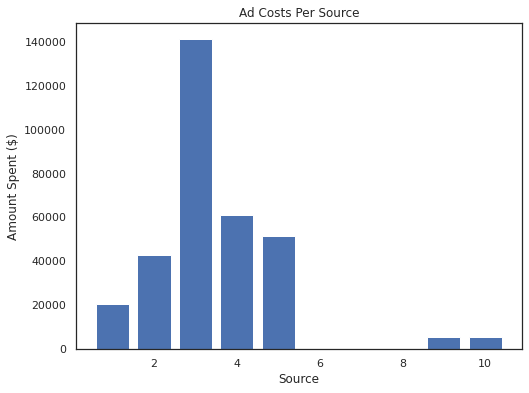

In [29]:
# per source
cost_per_source = cost.groupby('source_id').agg({'ad_expenses':'sum'}).reset_index()
cost_per_source.columns = ['source_id','total_ad_expenses']
print(cost_per_source.sort_values('total_ad_expenses',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(cost_per_source['source_id'],cost_per_source['total_ad_expenses'])
plt.title('Ad Costs Per Source')
plt.xlabel('Source')
plt.ylabel('Amount Spent ($)')
plt.show()

Total cost per source is shown above in the graph. source id 3 has most of the spending.

    ad_month  ad_expenses
11        12     38315.35
10        11     37907.88
9         10     36322.88
0          1     33518.52
1          2     32723.03
2          3     30415.27
8          9     24368.91
3          4     22289.38
4          5     22224.27
6          7     18240.59
5          6     18015.00
7          8     14790.54


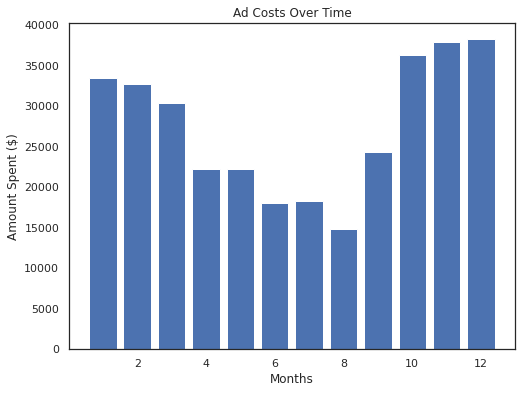

In [30]:
# Over time
cost_over_time = cost.copy()
cost_over_time['ad_month'] = cost['ad_datetime'].astype('datetime64[M]').dt.month
cost_over_time = cost_over_time.groupby('ad_month').agg({'ad_expenses':'sum'}).reset_index()
cost_over_time.columns = ['ad_month','ad_expenses']
print(cost_over_time.sort_values('ad_expenses',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(cost_over_time['ad_month'],cost_over_time['ad_expenses'])
plt.title('Ad Costs Over Time')
plt.xlabel('Months')
plt.ylabel('Amount Spent ($)')
plt.show()

In the december yandex has payed more money on ads which was around $38315.

###  How much did customer acquisition from each of the sources cost?

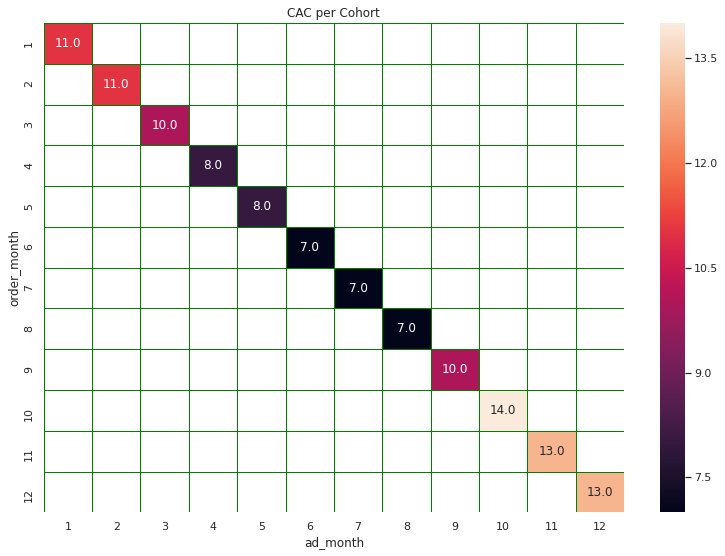

In [31]:
# How much did customer acquisition from each of the sources cost?

# CAC
# calculate ad expenses per month
monthly_ad_cost = cost.copy()
monthly_ad_cost['ad_month'] = monthly_ad_cost['ad_datetime'].dt.month
monthly_ad_cost = monthly_ad_cost[['ad_month','ad_expenses']]
monthly_ad_cost = monthly_ad_cost.groupby('ad_month')['ad_expenses'].sum().reset_index()

# incorpordate data on costs
report['order_month'] = report['order_month'].dt.month

report = pd.merge(report, monthly_ad_cost, left_on='order_month', right_on='ad_month')

# calculate cac
report['cac'] = report['ad_expenses'] / report['n_buyers']

# starting at first order month and continuing through order months,what is cac per cohort
result = report.pivot_table(index='order_month',columns='ad_month',values='cac',aggfunc='mean').round()
result.fillna('')

plt.figure(figsize=(13,9))
plt.title('CAC per Cohort')
sns.heatmap(result, annot=True, fmt='.1f', linewidths=1, linecolor='green')
plt.show()

CAC (customer acquisition cost) is the cost of attracting a customer - how much was spent in marketing efforts to acquire a single customer. To calculate this, we can compare the amount spent on ads for the same month that the customer made a purchase by dividing expenses spent on ads by the number of buyers for each month.

###  How worthwhile where the investments?

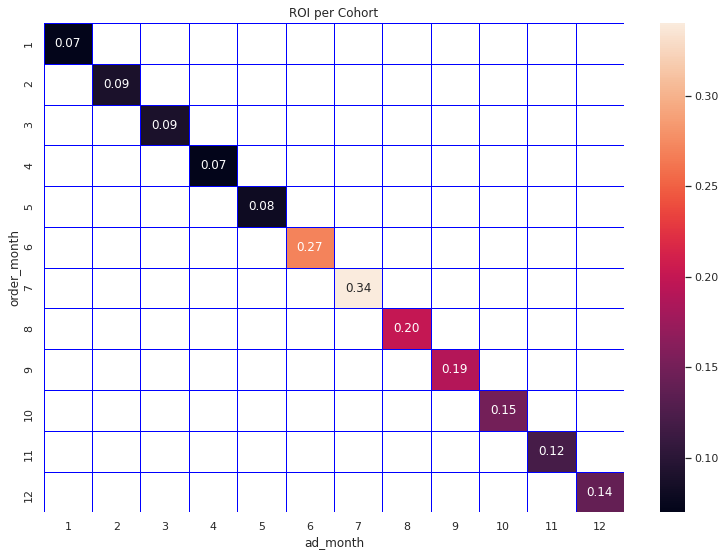

In [32]:
# How worthwhile where the investments? (ROI)

# calculate return on marketing investment 
report['romi'] = report['ltv'] / report['cac']

output = report.pivot_table(index='order_month', columns='ad_month',values='romi',aggfunc='mean')
output = output.cumsum(axis=1).round(2)
#print(output)

plt.figure(figsize=(13,9))
plt.title('ROI per Cohort')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='blue')
plt.show()

The July cohort paid off in the month (ROMI = 0.34). (we start counting at 0.)
The June and August cohort also paid off.
In general, by the 6th or 12th month, every cohort had either paid off or gotten close.

## Conclusion: advise marketing experts how much money to invest and where. 

What sources/platforms would you recommend? 
Source - Source Id 3 to 5
Back up your choice: what metrics did you focus on? 
Most users start buying between 0 to 5 days after the first session at almost 80% of users but thereafter, the largest turnover cohort falls in the 3-6 month window at 6% of users.
Why?
The July cohort paid off in the month (ROMI = 0.34). (we start counting at 0.) The June and August cohort also paid off. In general, by the 6th or 12th month, every cohort had either paid off or gotten close.
What conclusions did you draw after finding the metric values?
Users who ordered for product during the 0th week were more likely to use the app again. Maybe it's because they faced fewer difficulties afterward. It's worth considering how to encourage users to ask for help during the 0th lifetime week.
The thing is that the company began to grow faster in June. Expenses increased, and so did the number of new customers. But it takes six months to pay off, so profits haven't caught up to expenses yet. The business seems healthy.
Company need to work on more ad campaigns and advertisment in the first quarter of the year.